<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [2]:
df = pd.read_csv("../../DATA/Employee-attrition.csv")


In [3]:
df.head(10)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [4]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


# Accessing the main DataFrame components

In [5]:
columns = df.columns
index = df.index
data = df.values

In [6]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [7]:
index

RangeIndex(start=0, stop=49653, step=1)

In [8]:
data

array([[1318, '12/31/2006 0:00', '1/3/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2007 0:00', '1/3/1954', ..., 2007, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2008 0:00', '1/3/1954', ..., 2008, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [8279, '12/1/2015 0:00', '7/18/1994', ..., 2015, 'TERMINATED',
        'STORES'],
       [8296, '12/1/2013 0:00', '9/2/1994', ..., 2013, 'TERMINATED',
        'STORES'],
       [8321, '12/1/2014 0:00', '11/28/1994', ..., 2014, 'TERMINATED',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find the shape of the dataframe

In [9]:
# A:
df.shape

(49653, 18)

#### 1.B Find the data types of the dataframe

In [10]:
# A:
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

#### 1.C Find the number of data types in the dataframe



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [11]:
df.dtypes.value_counts()

object    13
int64      5
Name: count, dtype: int64

#### 1.D Use Info

Use info and explore the difference.

In [12]:
# A:
df.info

<bound method DataFrame.info of        EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0            1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1            1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2            1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3            1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4            1318  12/31/2010 0:00      1/3/1954        8/28/1989   
...           ...              ...           ...              ...   
49648        8258   12/1/2015 0:00     5/28/1994        8/19/2013   
49649        8264    8/1/2013 0:00     6/13/1994        8/27/2013   
49650        8279   12/1/2015 0:00     7/18/1994        9/15/2013   
49651        8296   12/1/2013 0:00      9/2/1994        10/9/2013   
49652        8321   12/1/2014 0:00    11/28/1994       11/24/2013   

      terminationdate_key  age  length_of_service    city_name  \
0                1/1/1900   52                 17    Vancouver   
1      

In [13]:
df.describe(include='all')

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
count,49653.000000,49653,49653,49653,49653,49653.000000,49653.000000,49653,49653,49653,49653.000000,49653,49653,49653,49653,49653.000000,49653,49653
unique,NaN,130,5342,4415,1055,NaN,NaN,40,21,47,NaN,2,2,4,3,NaN,2,2
top,NaN,12/31/2013 0:00,3/23/1973,9/25/2006,1/1/1900,NaN,NaN,Vancouver,Meats,Meat Cutter,NaN,F,Female,Not Applicable,Not Applicable,NaN,ACTIVE,STORES
freq,NaN,5215,40,50,42450,NaN,NaN,11211,10269,9984,NaN,25898,25898,48168,48168,NaN,48168,49068
mean,4859.495740,NaN,NaN,NaN,NaN,42.077035,10.434596,NaN,NaN,NaN,27.297605,NaN,NaN,NaN,NaN,2010.612612,NaN,NaN
std,1826.571142,NaN,NaN,NaN,NaN,12.427257,6.325286,NaN,NaN,NaN,13.514134,NaN,NaN,NaN,NaN,2.845577,NaN,NaN
min,1318.000000,NaN,NaN,NaN,NaN,19.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2006.000000,NaN,NaN
25%,3360.000000,NaN,NaN,NaN,NaN,31.000000,5.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN
50%,5031.000000,NaN,NaN,NaN,NaN,42.000000,10.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
75%,6335.000000,NaN,NaN,NaN,NaN,53.000000,15.000000,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN


# 2. Selecting Column in Data Frame

#### 2.A Check Values of the `job_title` column

In [14]:
# A:
df["job_title"]

0                 CEO
1                 CEO
2                 CEO
3                 CEO
4                 CEO
             ...     
49648    Dairy Person
49649         Cashier
49650         Cashier
49651         Cashier
49652         Cashier
Name: job_title, Length: 49653, dtype: object

#### 2.B Find how many rows are in each job title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [15]:
# A:
df["job_title"].value_counts()

job_title
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer              

#### 2.C [BONUS] Write a function to count the number of rows


```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



In [16]:
def row_count(column_name):
    number_of_rows = column_name.value_counts()
    return number_of_rows

row_count(df["BUSINESS_UNIT"])

BUSINESS_UNIT
STORES        49068
HEADOFFICE      585
Name: count, dtype: int64

In [17]:
# Using lambda

row_count_2 = lambda column_name: column_name.value_counts()
row_count_2(df["BUSINESS_UNIT"])

BUSINESS_UNIT
STORES        49068
HEADOFFICE      585
Name: count, dtype: int64

#### 2.D Describe `age`

Find the count, mean, std, min, max of the column 'age'

In [18]:
# A:
df["age"].describe()

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64

In [42]:
b = df["age"].describe()
print(b.iloc[0])

49653.0


##### 2.E [BONUS] Describe all numeric columns of the dataframe

Find the count, mean, std, min, max of all columns of the dataframe

In [19]:
# A:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,49653.0,4859.495740,1826.571142,1318.0,3360.0,5031.0,6335.0,8336.0
age,49653.0,42.077035,12.427257,19.0,31.0,42.0,53.0,65.0
length_of_service,49653.0,10.434596,6.325286,0.0,5.0,10.0,15.0,26.0
store_name,49653.0,27.297605,13.514134,1.0,16.0,28.0,42.0,46.0
STATUS_YEAR,49653.0,2010.612612,2.845577,2006.0,2008.0,2011.0,2013.0,2015.0


# 3. Make the index meaningful by making `EmployeeID` the index

In [20]:
# A: Making the employee ID the index
df.set_index("EmployeeID", inplace=True)

df.head()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


#### 3.A Find a specific row using the index

In [21]:
# A:
df.loc[1318]

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE


#### 3.B Sort the dataframe using the index

In [22]:
# A: in the descending order
df.sort_index(ascending=False)

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
8336,12/31/2015 0:00,12/31/1994,12/11/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,STORES
8336,12/31/2014 0:00,12/31/1994,12/11/2013,1/1/1900,20,1,Vancouver,Dairy,Dairy Person,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,STORES
8336,12/31/2013 0:00,12/31/1994,12/11/2013,1/1/1900,19,0,Vancouver,Dairy,Dairy Person,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8335,12/31/2015 0:00,12/28/1994,12/10/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,STORES
8335,12/31/2014 0:00,12/28/1994,12/10/2013,1/1/1900,20,1,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2014,ACTIVE,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE


#### 3.C [BONUS] Sort the dataframe using `age`

In [23]:
# A: Descending values
df.sort_values('age', ascending=False)

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
2800,6/1/2007 0:00,6/3/1942,12/9/1993,6/3/2007,65,13,Prince George,Meats,Meat Cutter,26,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2674,2/1/2007 0:00,2/11/1942,8/19/1993,2/11/2007,65,13,Kelowna,Meats,Meat Cutter,16,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2598,11/1/2006 0:00,11/22/1941,5/30/1993,11/22/2006,65,13,Abbotsford,Produce,Produce Clerk,1,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
2599,11/1/2006 0:00,11/25/1941,6/2/1993,11/25/2006,65,13,Fort Nelson,Meats,Meat Cutter,11,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
2608,12/1/2006 0:00,12/1/1941,6/8/1993,12/1/2006,65,13,Vancouver,Dairy,Dairy Person,35,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8283,12/31/2013 0:00,8/11/1994,9/27/2013,1/1/1900,19,0,Vernon,Customer Service,Cashier,36,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8222,12/31/2013 0:00,2/1/1994,6/18/2013,1/1/1900,19,0,Williams Lake,Customer Service,Cashier,40,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8221,12/31/2013 0:00,1/28/1994,6/16/2013,1/1/1900,19,0,New Westminster,Customer Service,Cashier,21,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES


#### 3.D [BONUS] Using `sample` select any row

In [24]:
# A:
df.sample(4)

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
6756,12/31/2008 0:00,11/10/1982,7/15/2007,1/1/1900,26,1,Richmond,Dairy,Dairy Person,29,F,Female,Not Applicable,Not Applicable,2008,ACTIVE,STORES
5493,12/31/2009 0:00,9/21/1972,3/7/2002,1/1/1900,37,7,Surrey,Bakery,Baker,31,F,Female,Not Applicable,Not Applicable,2009,ACTIVE,STORES
6669,12/31/2010 0:00,2/20/1982,2/26/2007,1/1/1900,28,3,Prince George,Customer Service,Cashier,26,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,STORES
2795,12/31/2014 0:00,1/29/1957,12/2/1993,1/1/1900,57,21,Fort St John,Meats,Meat Cutter,12,F,Female,Not Applicable,Not Applicable,2014,ACTIVE,STORES


# 4. Query Data Frame

#### 4.A Find rows Where `job_title` is CEO

In [25]:
# A:
df[df["job_title"] == 'CEO']

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE


In [26]:
df[df["job_title"] != 'CEO'].groupby('job_title').count()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
job_title,,,,,,,,,,,,,,,,
Accounting Clerk,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
Accounts Payable Clerk,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Accounts Receiveable Clerk,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Auditor,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Baker,8096,8096,8096,8096,8096,8096,8096,8096,8096,8096,8096,8096,8096,8096,8096,8096
Bakery Manager,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285
Benefits Admin,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
CHief Information Officer,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Cashier,6816,6816,6816,6816,6816,6816,6816,6816,6816,6816,6816,6816,6816,6816,6816,6816


#### 4.B Group by `age` and find how many there are of each age

In [27]:
df.groupby('city_name', as_index=False).age.mean().sort_values(by='age', ascending = False)

,city_name,age
22,Ocean Falls,51.307692
9,Dease Lake,46.000000
24,Port Coquitlam,44.511927
8,Dawson Creek,43.961240
37,West Vancouver,43.949429
31,Terrace,43.708469
29,Squamish,43.440447
16,Langley,43.355161
35,Vernon,42.983296
27,Quesnel,42.960171


In [28]:
# A:
df.groupby('age').size()

age
19     158
20     408
21     703
22     815
23     960
24    1111
25    1197
26    1210
27    1235
28    1225
29    1227
30    1212
31    1146
32    1153
33    1164
34    1188
35    1189
36    1176
37    1149
38    1156
39    1142
40    1130
41    1135
42    1152
43    1150
44    1157
45    1141
46    1161
47    1173
48    1180
49    1196
50    1218
51    1207
52    1188
53    1188
54    1159
55    1168
56    1154
57    1130
58    1130
59    1128
60    1109
61     757
62     712
63     667
64     646
65     593
dtype: int64

In [29]:
df.head()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [30]:
df.groupby(['city_name'], as_index=False).agg({'recorddate_key':'nunique', 'age':'mean'})

,city_name,recorddate_key,age
0,Abbotsford,25,40.728341
1,Aldergrove,21,41.592308
2,Bella Bella,15,37.769841
3,Blue River,9,40.000000
4,Burnaby,36,41.804548
5,Chilliwack,39,42.774636
6,Cortes Island,11,41.488372
7,Cranbrook,38,41.109244
8,Dawson Creek,11,43.961240
9,Dease Lake,9,46.000000


# 5. Visualisation


#### 5.A Plot a histogram of `age`

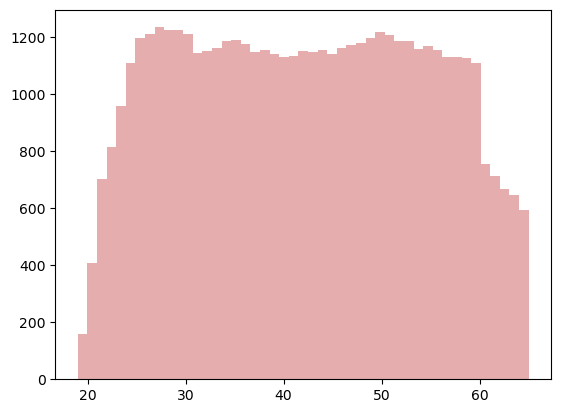

In [31]:
# A:
num_bin = 47
n, bins, patches = plt.hist(df.age, num_bin, facecolor='indianred', alpha=0.5)


Interpretation: The employees are quite diverse, no bias to any age group.

In [32]:
print(n)
print(bins)
print(patches)

[ 158.  408.  703.  815.  960. 1111. 1197. 1210. 1235. 1225. 1227. 1212.
 1146. 1153. 1164. 1188. 1189. 1176. 1149. 1156. 1142. 1130. 1135. 1152.
 1150. 1157. 1141. 1161. 1173. 1180. 1196. 1218. 1207. 1188. 1188. 1159.
 1168. 1154. 1130. 1130. 1128. 1109.  757.  712.  667.  646.  593.]
[19.         19.9787234  20.95744681 21.93617021 22.91489362 23.89361702
 24.87234043 25.85106383 26.82978723 27.80851064 28.78723404 29.76595745
 30.74468085 31.72340426 32.70212766 33.68085106 34.65957447 35.63829787
 36.61702128 37.59574468 38.57446809 39.55319149 40.53191489 41.5106383
 42.4893617  43.46808511 44.44680851 45.42553191 46.40425532 47.38297872
 48.36170213 49.34042553 50.31914894 51.29787234 52.27659574 53.25531915
 54.23404255 55.21276596 56.19148936 57.17021277 58.14893617 59.12765957
 60.10638298 61.08510638 62.06382979 63.04255319 64.0212766  65.        ]
<BarContainer object of 47 artists>


#### 5.B BoxPlot of `age`

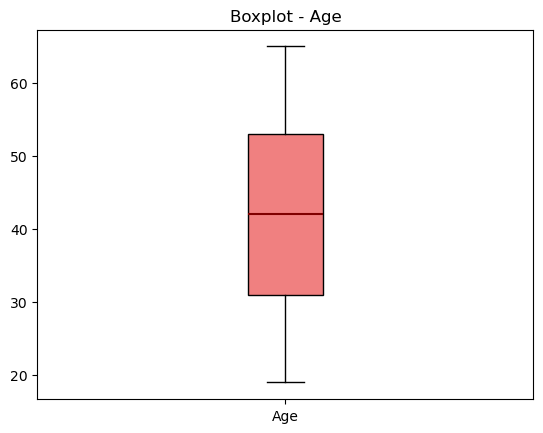

In [33]:
# A:
plt.boxplot(df.age, patch_artist=True, medianprops=dict(color = "maroon", linewidth=1.5), boxprops = dict(facecolor = "lightcoral"))
plt.title("Boxplot - Age")
plt.xticks([1],["Age"])
plt.show()

#### 5.C Create a scatterplot of `age` and `length_of_service`

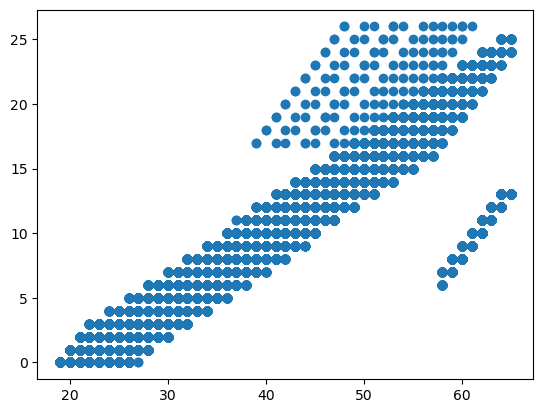

In [34]:
# A:
plt.scatter(df.age, df.length_of_service)
plt.show()

Interpretation: The older you are, the longer you spend in the company.

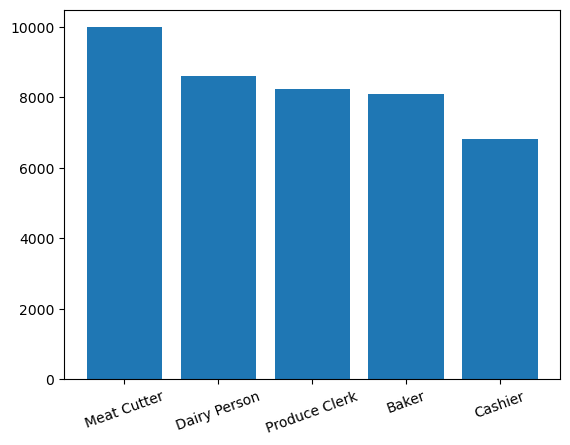

In [35]:
# Bar plot by job title, top 5 job titles that have the most number of people

job_title_df = df.groupby('job_title', as_index=False).size().sort_values(by='size', ascending=False)

plt.bar(job_title_df['job_title'][:5], job_title_df['size'][:5])
plt.xticks(fontsize=10, rotation=20)
plt.show()

#### 5.D Print a statistical summary of `age`

In [36]:
# A:
df.age.describe()

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



